# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:** 

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах(м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении


### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('real_estate_data.csv')

In [3]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Для корректного прочтения данных следует поставить разделители sep.

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [7]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.duplicated().sum()

0

## Вывод

- Согласно данным, пропущенных значений достаточно много
- Более того, некоторые столбцы требуется еще привести к нужному формату. Так, first_day_exposition надо привести к читаемому формату/изменить тип ячейки c помощью to_datetime
- is_apartment для удобства следует поменять c булева тип, на int (1,0). Аналогично со studio, open_plan.
- last_price и total_area следует привести к int c float
- last_price есть смысл перевести в млн. руб. - слишком огромные значения
- locality_name нужно проверить на дубликаты
- В процессе дальнейшего анализа - Предобработки данных, нужно подумать, что сделать с остальными многочисленными пропущенными строками
- Повторяющихся строк нет

### Шаг 2. Предобработка данных

1) Для начала, заменим типы булевы типа studio, open_plan на int.

In [9]:
data['studio'] = data.studio.astype(int)

In [10]:
data.studio.value_counts()

0    23550
1      149
Name: studio, dtype: int64

In [11]:
data['open_plan'] = data.open_plan.astype(int)

In [12]:
data.studio.value_counts()

0    23550
1      149
Name: studio, dtype: int64

2) Мы не можем пока поступить аналогично с is_apartment, ибо в данной ячейки есть пропущенные значения. Посмотрим, что происходит с is_apartment.

In [13]:
data.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Как видно, в основном False. Есть логика в предположении, что люди, не живущие в апартаментах, просто не указывают данную информацию. Заполним пропуски False.

In [14]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [15]:
data.is_apartment = data.is_apartment.astype(int)

In [16]:
data.is_apartment.value_counts()

0    23649
1       50
Name: is_apartment, dtype: int64

3) first_day_exposition приведем к правильному формату с помощью to_datetime.

In [17]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


4) Хотелось бы привести last_price и total_area к int c float. Ибо для данных значений float не имеет никакого смысла.

In [19]:
data.last_price = data.last_price.astype(int)

In [20]:
data.total_area = data.total_area.astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null int64
open_plan               23699 non-null int64
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aro

5) C количеством балконов balcony кажется, что в объявлениях о продаже наличия балконо люди бы точно указавали, или же ничего не указывали при их отсутствии, поэтому я бы заменили balcony None на 0.

In [22]:
data.balcony = data.balcony.fillna(0).astype(int)

In [23]:
data.last_price.value_counts()

4500000     342
3500000     291
4300000     260
4000000     260
4200000     259
           ... 
3247000       1
8555400       1
11748225      1
2182000       1
12288000      1
Name: last_price, Length: 2978, dtype: int64

6) last_price есть смысл превратить в миллионы - слишком уж большие значения.

In [24]:
data.last_price = data.last_price/1000000
data.last_price = data.last_price.round(2)

In [25]:
data.last_price.value_counts(ascending = True)

26.11      1
20.35      1
21.28      1
15.68      1
25.30      1
        ... 
3.60     273
4.30     274
4.00     293
3.50     312
4.50     359
Name: last_price, Length: 1646, dtype: int64

In [26]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [27]:
 data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.00,108,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.35,40,2018-12-04,1,NaN,11.0,18.6,1,0,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.20,56,2015-08-20,2,NaN,5.0,34.3,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.90,159,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.00,100,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


7) Посмотрим, что происходит с locality_name. Приведем столбец к нижнему регистру.

In [28]:
data.locality_name = data.locality_name.str.lower()

In [29]:
data.locality_name.unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [30]:
data.locality_name.value_counts().count()

364

Как видно - разные значения 'поселок' и 'посёлок'. Оставим везде 'поселок'.

In [31]:
data['locality_name'] = [str(x).replace('ё','е') for x in data['locality_name']]


In [32]:
data.locality_name.value_counts().count()

331

In [33]:
data.locality_name.unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [34]:
data.duplicated().sum()

0

In [35]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

8) Значения высоты потолка (ceiling_height) , скорее всего, люди просто не указывали. Посмотрим медиану и среднее данного значения.

In [36]:
data.ceiling_height.median()

2.65

In [37]:
data.ceiling_height.mean()

2.77149889685604

В целом, особо без разницы, какими данными заполнять ceiling_height, однако все-таки заполним медианой.

In [38]:
data.ceiling_height = data.ceiling_height.fillna(data.ceiling_height.median())

In [39]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

floors_total пропущенных всего 86 меньше 1% - можно убрать данные пропущенные значения - однако данные значения могут повлиять на интересующие нас факторы анализа в дальнейшем, поэтому оставим.

In [40]:
86/23699

0.0036288450989493226

9) Сами заполнить данные корректно floors_total, living_area, kitchen_area, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition мы не сможем, поэтому стоит либо прсто оставить пустые значения, либо можно заменить пустые значения на -1 для удобства дальнейшего анализа и удобного перевода в int значений. Так и сделаем. И сразу переведем все эти столбцы в int.

In [41]:
for column in ['floors_total', 'living_area', 'kitchen_area', 'airports_nearest',
               'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000',
               'ponds_nearest', 'days_exposition']:
    data[column]= data[column].fillna(-1)
    data[column]= data[column].astype(int)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null int64
studio                  23699 non-null int64
open_plan               23699 non-null int64
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000      

In [43]:
data.isnull().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [44]:
data.duplicated().sum()

0

## Вывод
- Заменили типы булевы studio, open_plan на int
- Заменили пропуски в is_apartment на False, ибо люди, не живущие в апартаментах, просто не указывают данную информацию, продавая недвижимость, а затем привели столбец is_apartment в тип int
- Привели first_day_exposition в тип данных datetime
- Привели last_price и total_area к int c float. Ибо для данных значений float не имеет никакого смысла
- Пустые значения balcony заменили на 0
- Столбец last_price перевели в млн
- Привели к нижнему регистру столбец locality_name и поменяли везде ё на е, чтоб повторений не было
- Значения высоты потолка (ceiling_height) , скорее всего, люди просто не указывали. Заменили в данном столбце пропуски на медиану
- Заменили их на -1 пустые значения в столбцах, где нельзя и , чтобы в будущем анализе было легче провести срез
- Перевели столбцы в формат *int* 'floors_total', 'living_area', 'kitchen_area', 'airports_nearest','cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' так как 'floors_total', 'days_exposition', 'ponds_around3000', parks_around3000 - явно целочисленные выражения, тогда как для остальных значений нас интересуют м^2 - значения в см^2 нерелевантны
- Дубликатов нет

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим в таблицу: цена квадратного метра - price_for_meter

In [45]:
data['price_for_meter']= data['last_price']/data['total_area']

Добавим день недели, месяц и год публикации объявления;


In [46]:
data['published_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [47]:
data['published_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [48]:
data['published_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Добавим этаж квартиры; варианты — первый, последний, другой;


In [49]:
def floor(floor,floors_total):
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [50]:
data['floor_of_house'] = data.apply(lambda x: floor(x.floor, x.floors_total), axis=1)

Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [51]:

data['living_area_to_all_area'] = data['living_area']/data['total_area']

In [52]:
data['kitchen_to_all_area'] = data['kitchen_area']/data['total_area']

Помним, что в kitchen_area и living_area есть отрицательные значения = -1 вместо None.

In [53]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,published_weekday,published_month,published_year,floor_of_house,living_area_to_all_area,kitchen_to_all_area
0,20,13.00,108,2019-03-07,3,2.70,16,51,8,0,...,2,755,-1,0.120370,3,3,2019,другой,0.472222,0.231481
1,7,3.35,40,2018-12-04,1,2.65,11,18,1,0,...,0,-1,81,0.083750,1,12,2018,первый,0.450000,0.275000
2,10,5.20,56,2015-08-20,2,2.65,5,34,4,0,...,2,574,558,0.092857,3,8,2015,другой,0.607143,0.142857
3,0,64.90,159,2015-07-24,3,2.65,14,-1,9,0,...,3,234,424,0.408176,4,7,2015,другой,-0.006289,-0.006289
4,2,10.00,100,2018-06-19,2,3.03,14,32,13,0,...,1,48,121,0.100000,1,6,2018,другой,0.320000,0.410000


## Вывод
В таблицу добавлены столбцы:  
Цена квадратного метра - price_for_meter  
День недели публикации объявления - published_weekday  
Месяц публикации объявления - published_month  
Год публикации объявления - published_year  
Соотношение жилой и общей площади - living_area_to_all_area  
Отношение площади кухни к общей - kitchen_to_all_area

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 1) Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Изучить время продажи квартиры. 

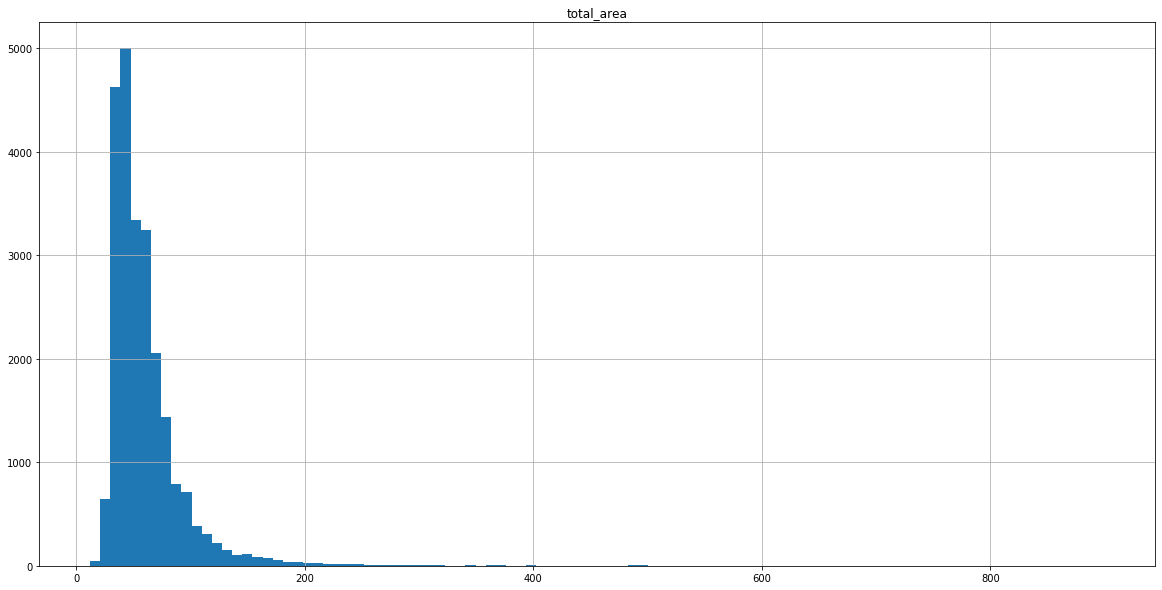

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64


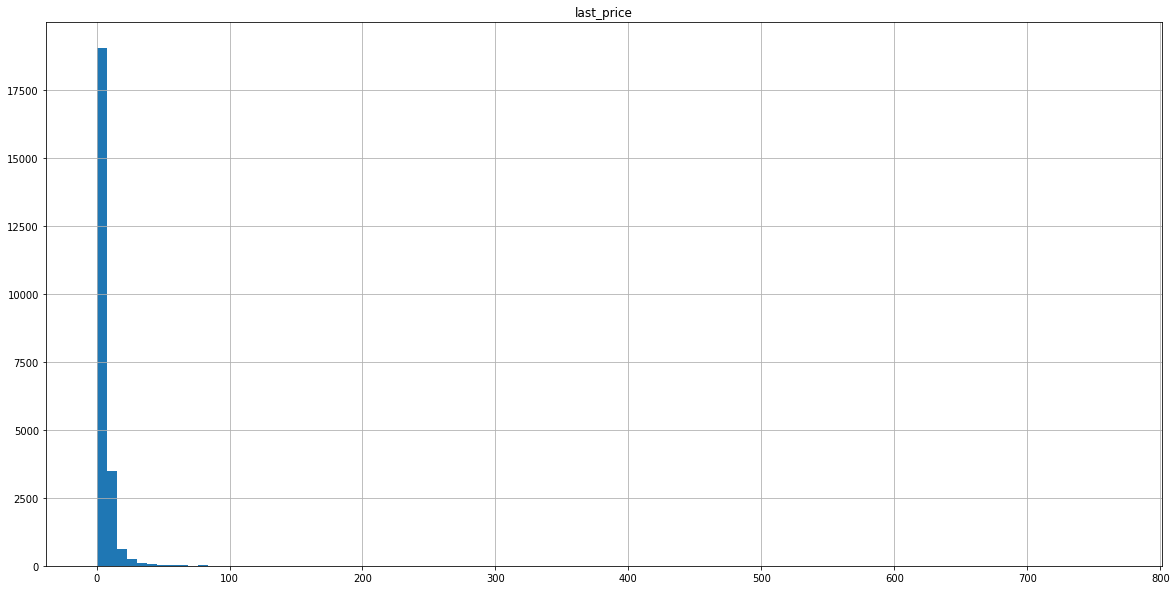

count    23699.000000
mean         6.541597
std         10.887011
min          0.010000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


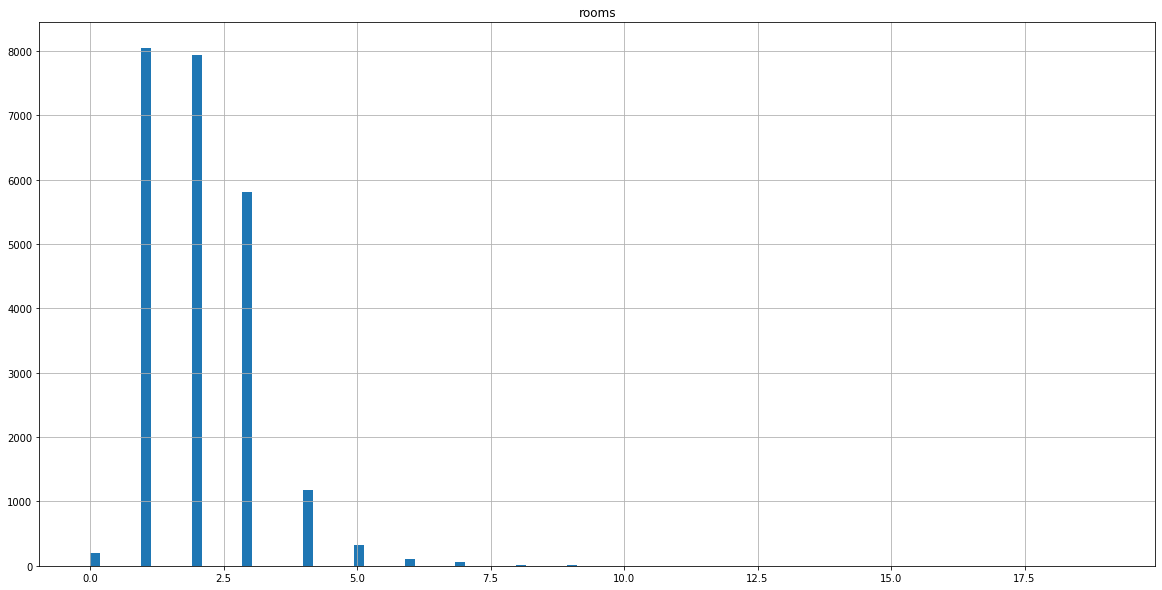

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


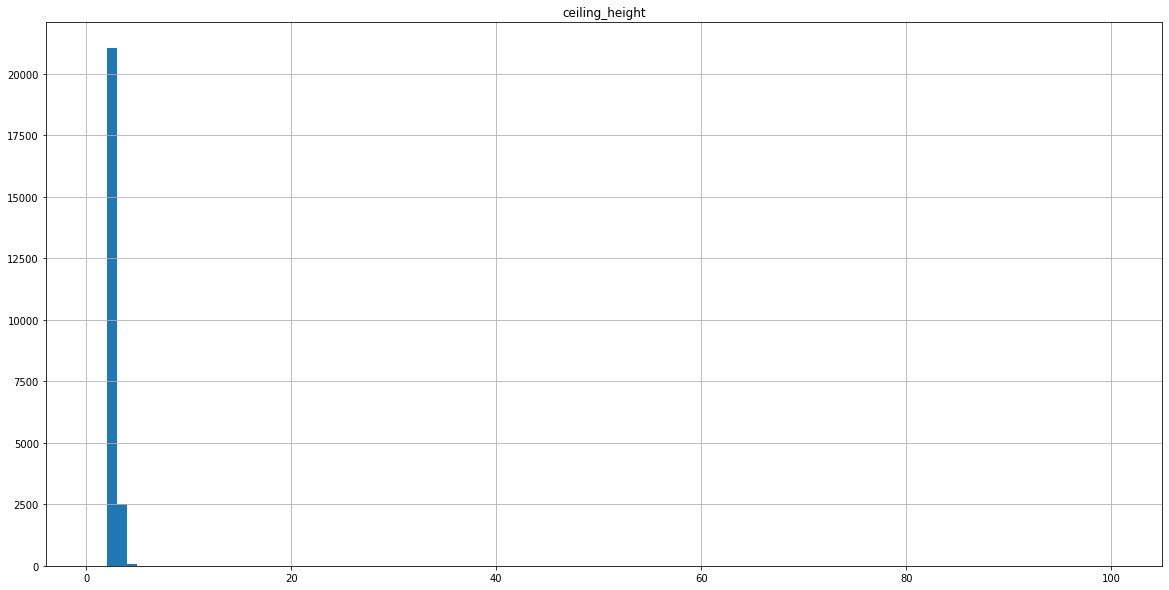

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


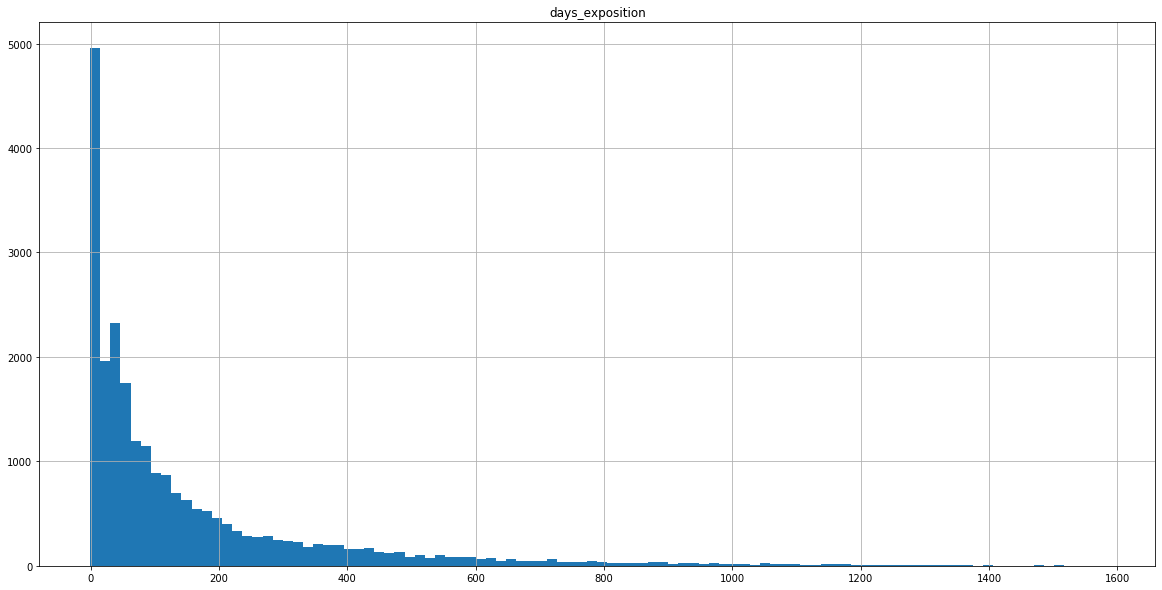

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [54]:
for column in data[['total_area','last_price','rooms','ceiling_height','days_exposition']]:
    range_max = data[column].max()
    range_min = data[column].min()
    data[column].hist(bins=100, range=(range_min, range_max), figsize=(20,10))
    plt.title(column)
    plt.show()
    print(data[column].describe())

In [55]:
for column in ['total_area','last_price','rooms','ceiling_height', 'days_exposition']:
    print(column, data[column].median(), '- медиана')
    print(column, data[column].mean(), '- среднее')

total_area 52.0 - медиана
total_area 60.120511413983714 - среднее
last_price 4.65 - медиана
last_price 6.541596691843537 - среднее
rooms 2.0 - медиана
rooms 2.070635891809781 - среднее
ceiling_height 2.65 - медиана
ceiling_height 2.724358411747331 - среднее
days_exposition 74.0 - медиана
days_exposition 156.47461918224397 - среднее


Площадь квартир распределена, в основном, между 30 и 50 м^2. Медиана равна 52 м^2.После 200 м^2, возможно, выбросы.
Цена квартир распределена, в основном, между 0 и 10 млн. руб. Дороже 60 млн. - явно выбросы.
Количество комнат - , в основном, 1,2 и 3 - комнатные квартиры. Больше 7 комнат - выбросы.
Насчет высоты потолков - между 2 и 3 метрами в основном. Выбросы после 4 метров.  
Объявления, в основном, размещены до 75 дней. Медиана- 74 дня.

Посмотрим получше аномалии с помощью boxplot, так не очень понятно.

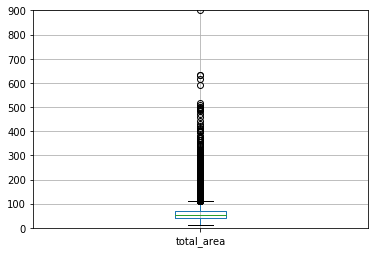

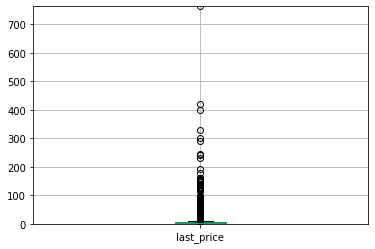

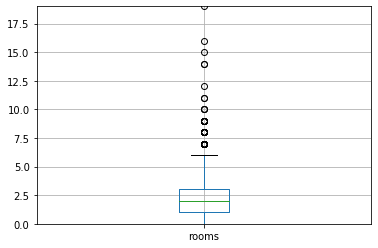

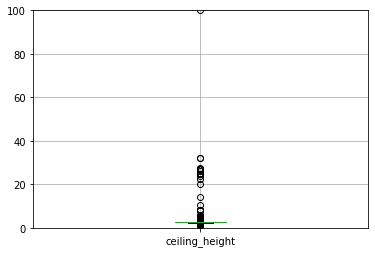

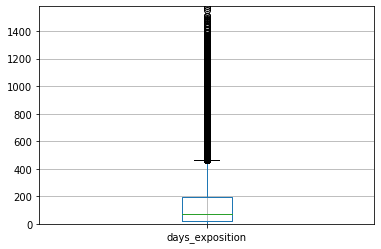

In [56]:
for column in ['total_area','last_price','rooms','ceiling_height', 'days_exposition']:
    data.boxplot(column)
    plt.ylim(0, data[column].max())
    plt.show()

(0, 60)

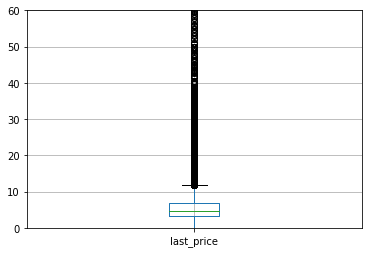

In [57]:
data.boxplot('last_price')
plt.ylim(0, 60)

(0, 5)

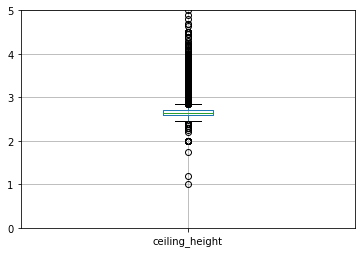

In [58]:
data.boxplot('ceiling_height')
plt.ylim(0, 5)

Площадь квартир распределена, в основном, между 30 и 50 м^2. Медиана равна 52 м^2.Выбросы лежат после 110 м^2 и до 20 м^2.  
Цена квартир распределена, в основном, между 0 и 10 млн. руб. Дороже 12 млн. - выбросы.  
Количество комнат - , в основном, 1, 2 и 3 - комнатные квартиры. Больше или равно 7 комнат - выбросы.  
Насчет высоты потолков - между 2 и 3 метрами в основном. Выбросы после 3 метров.  
Объявления, в основном, размещены до 75 дней, медиана - 74 дня. Выбросы после 450 дней.
К быстрым продажам можно отнести продажи до 74 дней (по медиане). Медленный продаже >= 75 дням. 

Посмотрим срезы данных без выбросов. Посчитаем процент данных, что остаются без выбросов.

In [59]:
total_area_slice = data.query('20 < total_area <= 120')
print('В срез по площади недвижимости попали: {:.1%}'.format(total_area_slice['total_area'].count() / data['total_area'].count()))

last_price_slice = data.query('0 <= last_price <= 12')
print('В срез по цене недвижимости попали: {:.1%}'.format(last_price_slice['last_price'].count() / data['last_price'].count()))

rooms_slice = data.query('0 <= rooms <= 6')
print('В срез по количеству комнат попали: {:.1%}'.format(rooms_slice['rooms'].count() / data['rooms'].count()))

ceiling_height_slice = data.query('0 < ceiling_height <= 3')
print('В срез по высоте потолка попали: {:.1%}'.format(ceiling_height_slice['ceiling_height'].count() / data['ceiling_height'].count()))

ceiling_height_slice = data.query('0 < days_exposition <= 450')
print('В срез по длительности продажи попали: {:.5%}'.format(ceiling_height_slice['days_exposition'].count() / data['days_exposition'].count()))

В срез по площади недвижимости попали: 95.4%
В срез по цене недвижимости попали: 91.8%
В срез по количеству комнат попали: 99.6%
В срез по высоте потолка попали: 93.5%
В срез по длительности продажи попали: 77.65307%


Удалим часть выбросов, где выбросов меньше 5%.

In [60]:
data = data.query('0 <= rooms <= 6')
data = data.query('20 < total_area <= 120')

###  Вывод
- Площадь квартир распределена, в основном, между 30 и 50 м^2. Медиана равна 52 м^2.Выбросы лежат после 110 м^2.  
Цена квартир распределена, в основном, между 0 и 10 млн. руб. Дороже 12 млн. - выбросы.   
Количество комнат - , в основном, 1,2 и 3 - комнатные квартиры. Больше или равно 7 комнат - выбросы.  
Насчет высоты потолков - между 2 и 3 метрами в основном. Выбросы после 3 метров.  
Объявления, в основном, размещены до 75 дней, медиана - 74 дня, тогда как среднее равно 156, что означает, что выборка скошена вправо. Выбросы после 450 дней.
- Были построены срезы без части выбросов, удалены некоторые строчки

#### 2) Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22603 entries, 0 to 23698
Data columns (total 29 columns):
total_images               22603 non-null int64
last_price                 22603 non-null float64
total_area                 22603 non-null int64
first_day_exposition       22603 non-null datetime64[ns]
rooms                      22603 non-null int64
ceiling_height             22603 non-null float64
floors_total               22603 non-null int64
living_area                22603 non-null int64
floor                      22603 non-null int64
is_apartment               22603 non-null int64
studio                     22603 non-null int64
open_plan                  22603 non-null int64
kitchen_area               22603 non-null int64
balcony                    22603 non-null int64
locality_name              22603 non-null object
airports_nearest           22603 non-null int64
cityCenters_nearest        22603 non-null int64
parks_around3000           22603 non-null int64
parks_nearest

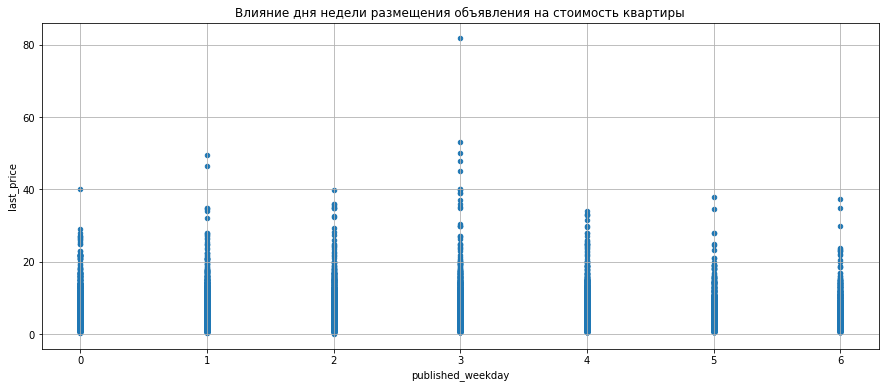

In [62]:
data.plot(kind = 'scatter', x='published_weekday',y = 'last_price', grid=True, figsize=(15,6))
plt.title('Влияние дня недели размещения объявления на стоимость квартиры')
plt.show()

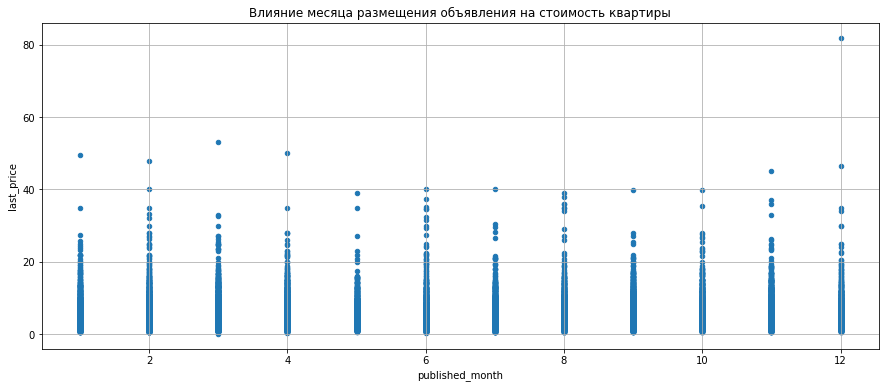

In [63]:
data.plot(kind = 'scatter', x='published_month',y = 'last_price', grid=True, figsize=(15,6))
plt.title('Влияние месяца размещения объявления на стоимость квартиры')
plt.show()

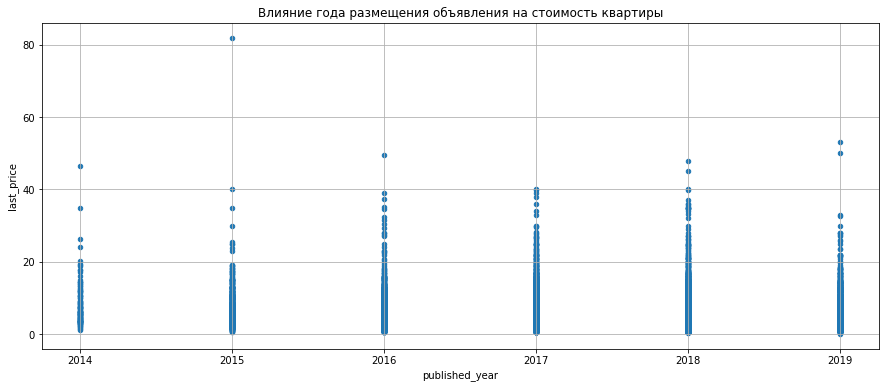

In [64]:
data.plot(kind = 'scatter', x='published_year',y = 'last_price', grid=True, figsize=(15,6))
plt.title('Влияние года размещения объявления на стоимость квартиры')
plt.show()

Как видно, дороже всего стоят квартиры, размещенные в четверг. Больше по данным графикам ничего не понятно, кроме того, что в 2015 году в декабре была продана самая дорогая недвижимость.  
Посмотрим по значению медианы.

In [65]:
day_of_sale=pd.pivot_table(data, index='published_weekday', values='last_price', aggfunc='median')
day_of_sale.sort_values(by='last_price')

,last_price
published_weekday,
0,4.50
3,4.50
4,4.50
5,4.50
6,4.50
2,4.55
1,4.60


In [66]:
day_of_sale.columns

Index(['last_price'], dtype='object')

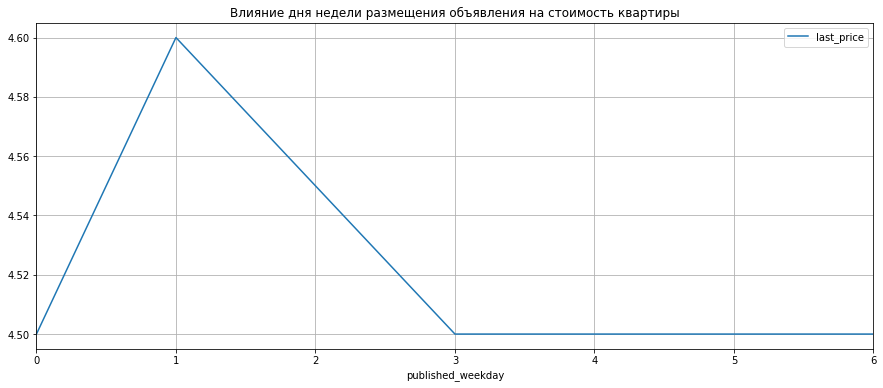

In [67]:
day_of_sale.plot(y = 'last_price', grid=True, figsize=(15,6))
plt.title('Влияние дня недели размещения объявления на стоимость квартиры')
plt.show()

In [68]:
month_of_sale=pd.pivot_table(data, index='published_month', values='last_price', aggfunc = 'median')
month_of_sale.sort_values(by='last_price')

,last_price
published_month,
6,4.30
5,4.44
1,4.50
2,4.50
7,4.50
8,4.50
10,4.50
3,4.55
9,4.57


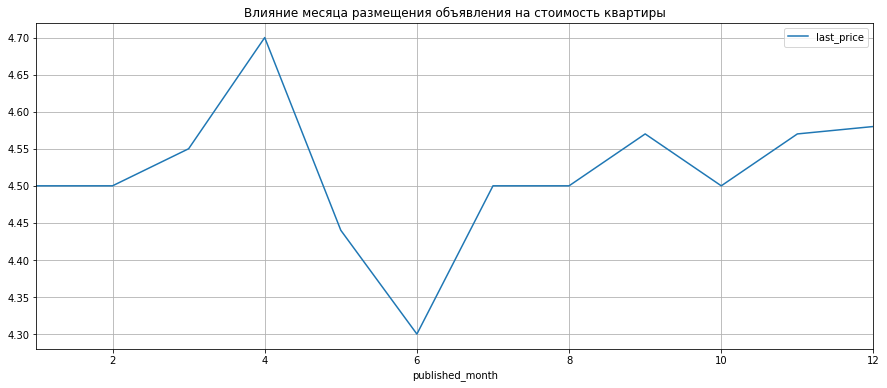

In [69]:
month_of_sale.plot(y = 'last_price', grid=True, figsize=(15,6))
plt.title('Влияние месяца размещения объявления на стоимость квартиры')
plt.show()

In [70]:
year_of_sale=pd.pivot_table(data, index='published_year', values='last_price', aggfunc = 'median')
year_of_sale.sort_values(by='last_price')

,last_price
published_year,
2016,4.40
2017,4.40
2018,4.50
2019,4.95
2015,5.08
2014,6.20


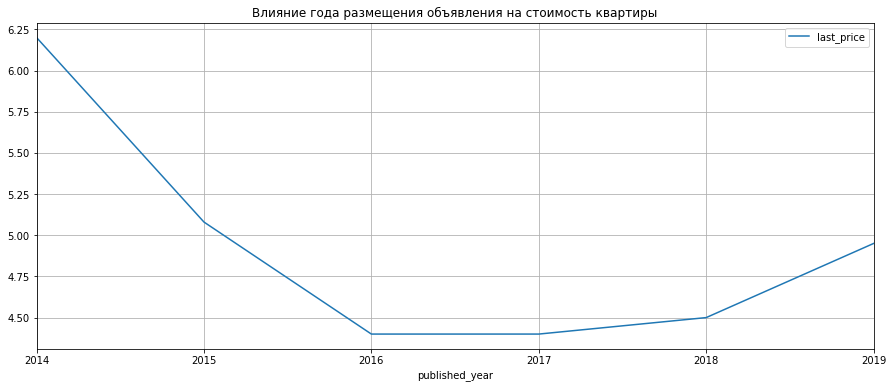

In [71]:
year_of_sale.plot(y = 'last_price', grid=True, figsize=(15,6))
plt.title('Влияние года размещения объявления на стоимость квартиры')
plt.show()

- Наибольшая медианная стоимость недвижимости - в 2014 году, наименьшая в 2016 и 2017 годам. При размещении в феврале недвижимости - стоимость выше,  наименьшая стоимость в мае. Четверг-  воскресенье - наименее удачные дни, при которых медианная стоимость недвижимости ниже всего, во вторник - наиболее высокая.

Посмотрим как влияет размер площади на цену квартиры

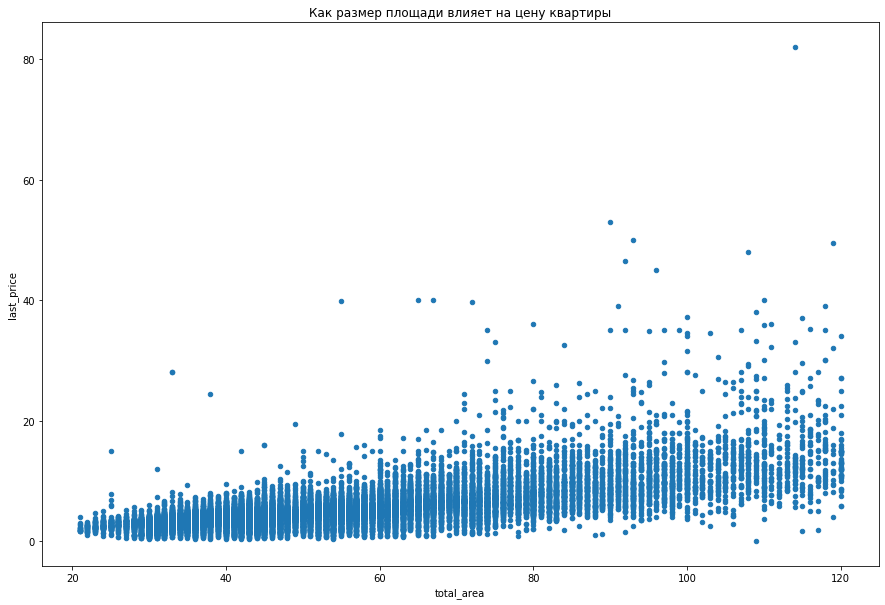

In [72]:
data.plot(y='last_price',x='total_area',kind='scatter', figsize=(15,10))
plt.title('Как размер площади влияет на цену квартиры')
plt.show()

По графику складывается ощущение, что чем больше площадь, тем больше цена.

Посмотрим, как количество комнат влияет на цену квартиры.

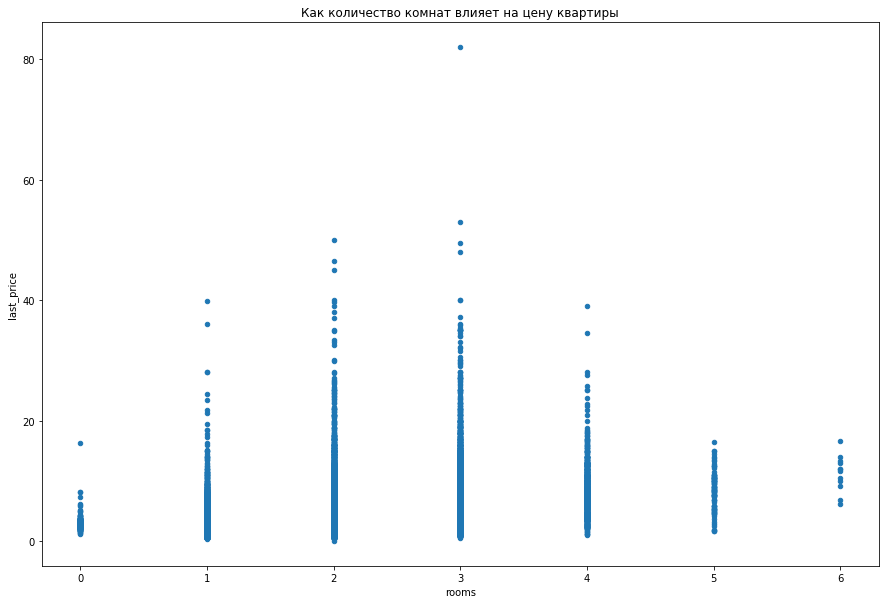

In [73]:
data.plot(y='last_price',x='rooms',kind='scatter', figsize=(15,10))
plt.title('Как количество комнат влияет на цену квартиры')
plt.show()

 Какой-то явной зависимости нет, но видно, что среди самых дорогих квартир - 3-комнатные.

In [74]:
data['last_price'].corr(data['rooms'])

0.3938303258435732

Однако существует значительная корреляция между площадью и числом комнат. ( Корреляция не равно причинно-следстенная связь, однако означает наличие некой положительной зависимости).

Посмотрим, зависит ли цена квартиры от удаленности от центра



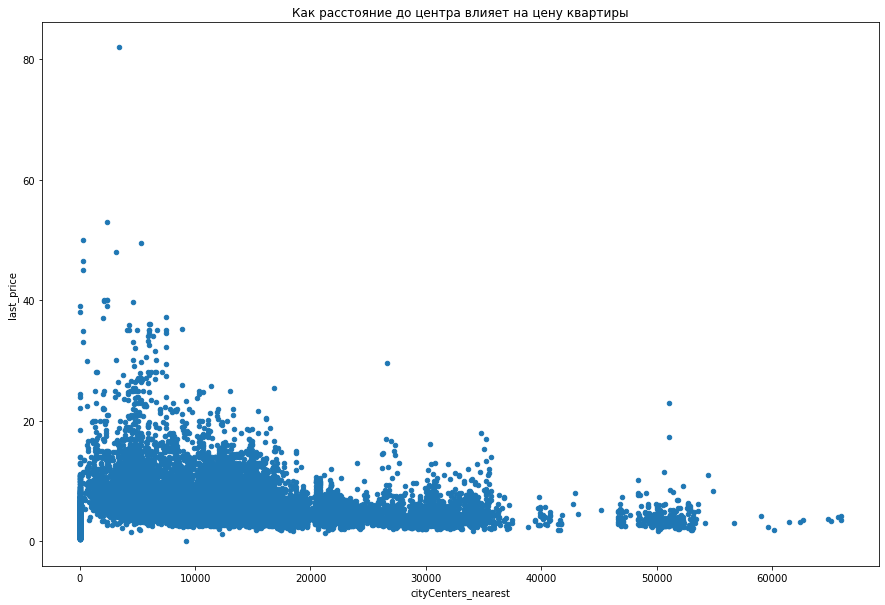

In [75]:
data.plot(y='last_price',x='cityCenters_nearest',kind='scatter', figsize=(15,10))
plt.title('Как расстояние до центра влияет на цену квартиры')
plt.show()

 По графику явно заметно, что чем меньше расстояние от квартиры до центра, тем она дороже.

Попробуем посмотреть квартира какого этажа стоит дороже

In [76]:
selling_floors= pd.pivot_table(data, index='floor', values='last_price', aggfunc='median')

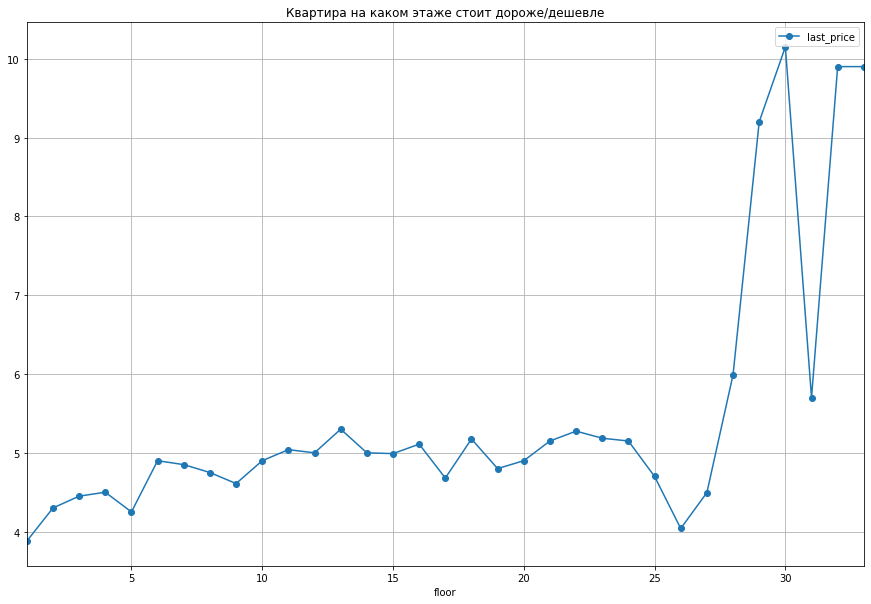

In [77]:
selling_floors.plot(y='last_price',style='o-', grid=True, figsize=(15,10))
plt.title('Квартира на каком этаже стоит дороже/дешевле')
plt.show()

Согласно медианному значению - наиболее дорогие квартиры все таки многоэтажные, даже скорее высотки, квартиры расположенные на 30+ этажах.

In [78]:
selling_floor_of_house=pd.pivot_table(data, index='floor_of_house', values='last_price', aggfunc='median')

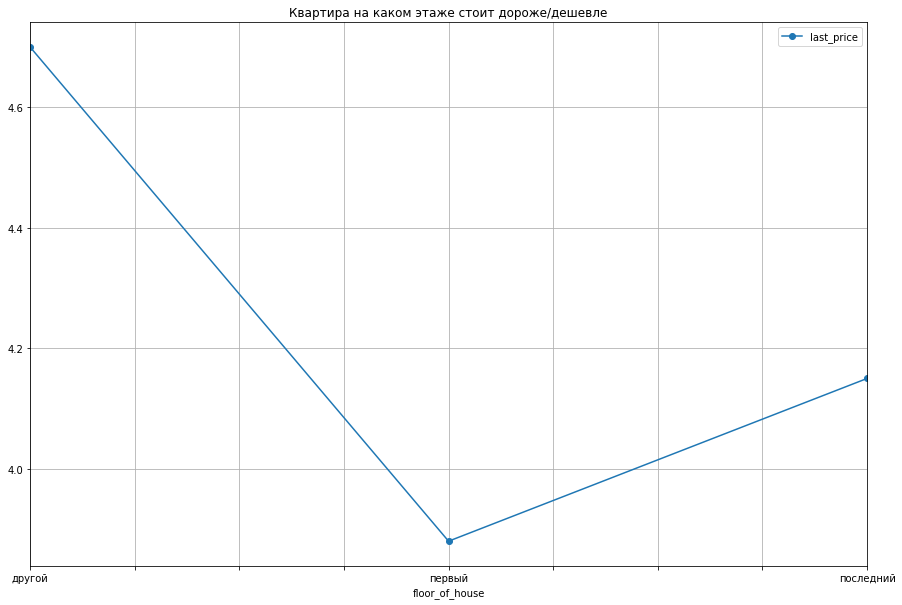

In [79]:
selling_floor_of_house.plot(y='last_price',style='o-', grid=True, figsize=(15,10))
plt.title('Квартира на каком этаже стоит дороже/дешевле')
plt.show()

На первом этаже - самые дешевые квартиры.

### Вывод:
- Наибольшая медианная стоимость недвижимости - в 2014 году, наименьшая в 2016 и 2017 годам. При размещении в феврале недвижимости - стоимость выше, наименьшая стоимость в мае. Четверг- воскресенье - наименее удачные дни, при которых медианная стоимость недвижимости ниже всего, во вторник - наиболее высокая
- Чем больше площадь квартиры, тем больше цена
- Чем большее число комнат, тем больше цена
- Чем меньше расстояние от квартиры до центра, тем она дороже
- На первом этаже - самые дешевые квартиры

#### 3)  Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [80]:
data['locality_name'].value_counts(ascending=False)[0:10]

санкт-петербург      14718
поселок мурино         550
поселок шушары         438
всеволожск             394
пушкин                 349
колпино                336
поселок парголово      326
гатчина                304
деревня кудрово        298
выборг                 232
Name: locality_name, dtype: int64

In [81]:
list_town = ['санкт-петербург',
    'посёлок мурино',
    'посёлок шушары',
    'всеволожск',
    'пушкин',
    'колпино',
    'посёлок парголово',
    'гатчина',
    'деревня кудрово',
    'выборг']

In [82]:
town_top10 = data.query('locality_name in @list_town')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22603 entries, 0 to 23698
Data columns (total 29 columns):
total_images               22603 non-null int64
last_price                 22603 non-null float64
total_area                 22603 non-null int64
first_day_exposition       22603 non-null datetime64[ns]
rooms                      22603 non-null int64
ceiling_height             22603 non-null float64
floors_total               22603 non-null int64
living_area                22603 non-null int64
floor                      22603 non-null int64
is_apartment               22603 non-null int64
studio                     22603 non-null int64
open_plan                  22603 non-null int64
kitchen_area               22603 non-null int64
balcony                    22603 non-null int64
locality_name              22603 non-null object
airports_nearest           22603 non-null int64
cityCenters_nearest        22603 non-null int64
parks_around3000           22603 non-null int64
parks_nearest

In [84]:
price = town_top10.pivot_table(index='locality_name', values='price_for_meter', aggfunc='median').sort_values(by='price_for_meter', ascending=False)

In [85]:
price

,price_for_meter
locality_name,
санкт-петербург,0.104545
пушкин,0.100000
деревня кудрово,0.092647
колпино,0.074861
гатчина,0.067925
всеволожск,0.065868
выборг,0.058500


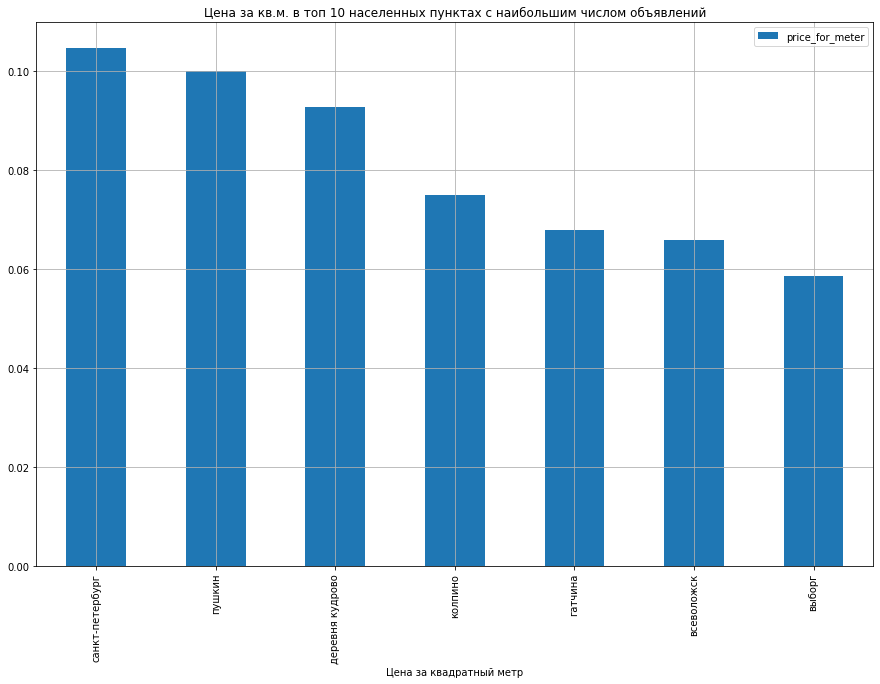

In [86]:
price.plot(y='price_for_meter', grid=True, figsize=(15,10), kind='bar')
plt.xlabel('Цена за квадратный метр')
plt.title('Цена за кв.м. в топ 10 населенных пунктах с наибольшим числом объявлений')
plt.show()

### Вывод:  

Самая высокая медианная стоимость жилья в Санкт-Петербурге - 104 545 рублей за квадратный метр. Город Пушкин на 2 месте - 100000 рублей.

Самая низкая медианная стоимость жилья расположена в Выборге - 58 500 рублей за квадратный метр, скорее всего потому что Выборг самый отдаленный населенный пункт от Санкт-Петербурга из всех перечисленных.

#### 4) Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

Создадим столбец distance_to_center(расстояние до центра) передадим столбец cityCenters_nearest и разделим на 1000, чтобы получить километры.

In [87]:
data['distance_to_center'] = (data['cityCenters_nearest']/1000).astype(int)

In [88]:
data['price_for_kilometer'] = data['last_price']/data['distance_to_center']

In [89]:
spb = data.query('locality_name == "санкт-петербург"')


In [90]:
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_meter,published_weekday,published_month,published_year,floor_of_house,living_area_to_all_area,kitchen_to_all_area,distance_to_center,price_for_kilometer
0,20,13.00,108,2019-03-07,3,2.70,16,51,8,0,...,-1,0.120370,3,3,2019,другой,0.472222,0.231481,16,0.812500
2,10,5.20,56,2015-08-20,2,2.65,5,34,4,0,...,558,0.092857,3,8,2015,другой,0.607143,0.142857,13,0.400000
4,2,10.00,100,2018-06-19,2,3.03,14,32,13,0,...,121,0.100000,1,6,2018,другой,0.320000,0.410000,8,1.250000
7,5,7.92,71,2019-04-18,2,2.65,24,-1,22,0,...,-1,0.111549,3,4,2019,другой,-0.014085,0.253521,11,0.720000
9,18,5.40,61,2017-02-26,3,2.50,9,43,7,0,...,289,0.088525,6,2,2017,другой,0.704918,0.098361,15,0.360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9.20,101,2019-04-01,3,3.05,15,63,12,0,...,23,0.091089,0,4,2019,другой,0.623762,0.148515,14,0.657143
23689,13,3.55,35,2018-02-28,1,2.86,15,16,4,0,...,29,0.101429,2,2,2018,другой,0.457143,0.257143,16,0.221875
23690,3,5.50,52,2018-07-19,2,2.65,5,31,2,0,...,15,0.105769,3,7,2018,другой,0.596154,0.115385,6,0.916667
23691,11,9.47,72,2016-10-13,2,2.75,25,40,7,0,...,519,0.131528,3,10,2016,другой,0.555556,0.138889,4,2.367500


In [91]:
spb_pivot = spb.pivot_table(index='distance_to_center', values='price_for_kilometer', aggfunc='median')

In [92]:
spb_pivot

,price_for_kilometer
distance_to_center,
0,inf
1,9.150000
2,4.250000
3,2.566667
4,2.127500
5,1.600000
6,1.166667
7,1.000000
8,0.774375


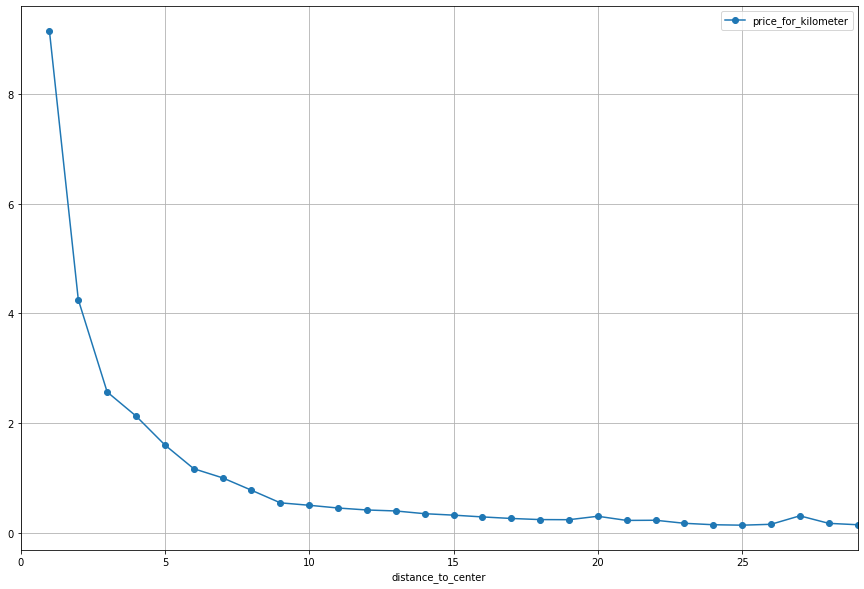

In [93]:
spb_pivot.plot(y='price_for_kilometer', grid=True, figsize=(15,10), style='o-')
plt.show()

### Вывод:
По графику создается впечатление, что центр находится в 6 км. Видно, что чем дальше от центра, тем дешевле квартира

#### 5) Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [94]:
center_house = data.query('distance_to_center <= 6')

In [95]:
center_house

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_for_meter,published_weekday,published_month,published_year,floor_of_house,living_area_to_all_area,kitchen_to_all_area,distance_to_center,price_for_kilometer
5,10,2.89,30,2018-09-10,1,2.65,12,14,5,0,...,55,0.096333,0,9,2018,другой,0.466667,0.300000,0,inf
8,20,2.90,33,2018-05-23,1,2.65,27,15,26,0,...,189,0.087879,2,5,2018,другой,0.454545,0.242424,0,inf
12,10,3.89,54,2016-06-30,2,2.65,5,30,5,0,...,90,0.072037,3,6,2016,последний,0.555556,0.166667,0,inf
22,20,5.00,58,2017-04-24,2,2.75,25,30,15,0,...,60,0.086207,0,4,2017,другой,0.517241,0.189655,0,inf
24,8,6.50,97,2015-10-31,2,2.65,3,46,1,0,...,265,0.067010,5,10,2015,первый,0.474227,0.195876,2,3.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9.47,72,2016-10-13,2,2.75,25,40,7,0,...,519,0.131528,3,10,2016,другой,0.555556,0.138889,4,2.3675
23692,2,1.35,30,2017-07-07,1,2.65,5,17,4,0,...,413,0.045000,4,7,2017,другой,0.566667,0.200000,0,inf
23695,14,3.10,59,2018-01-15,3,2.65,5,38,4,0,...,45,0.052542,0,1,2018,другой,0.644068,0.135593,0,inf
23696,18,2.50,56,2018-02-11,2,2.65,3,29,1,0,...,-1,0.044643,6,2,2018,первый,0.517857,-0.017857,0,inf


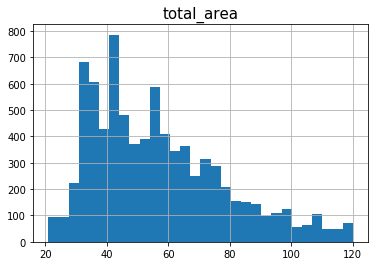

Медианное значение: 53.0


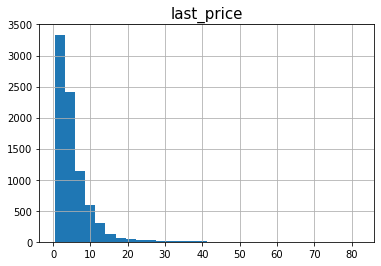

Медианное значение: 3.6


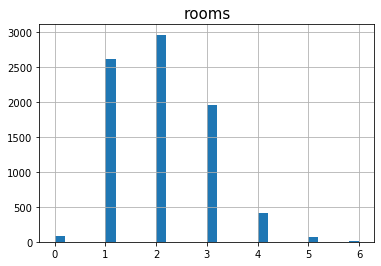

Медианное значение: 2.0


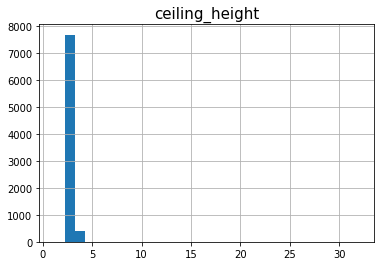

Медианное значение: 2.65


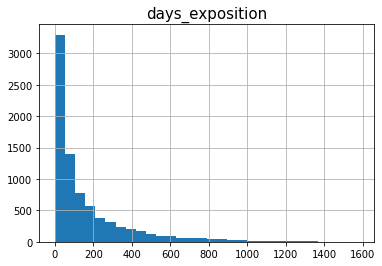

Медианное значение: 77.0


In [96]:
for column in center_house[['total_area','last_price','rooms','ceiling_height','days_exposition']]:
    range_max = center_house[column].max()
    range_min = center_house[column].min()
    center_house[column].hist(bins=30, range=(range_min,range_max))
    plt.title(column, fontsize=15)
    plt.show()
    print('Медианное значение:',center_house[column].median())

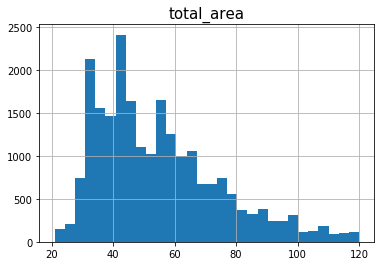

Медианное значение: 50.0


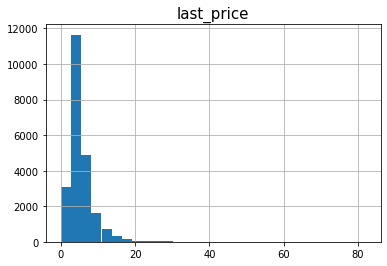

Медианное значение: 4.5


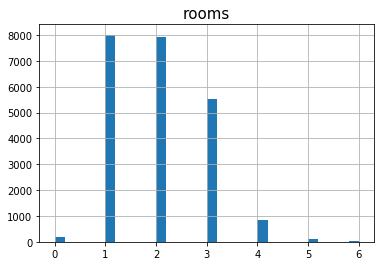

Медианное значение: 2.0


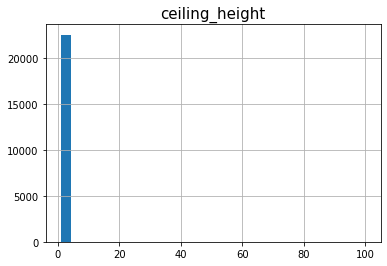

Медианное значение: 2.65


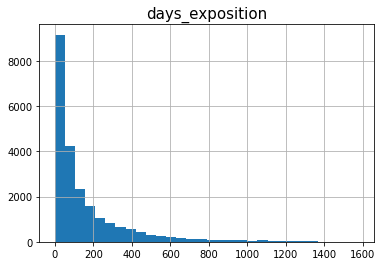

Медианное значение: 72.0


In [97]:
for column in data[['total_area','last_price','rooms','ceiling_height','days_exposition']]:
    range_max = data[column].max()
    range_min = data[column].min()
    data[column].hist(bins=30, range=(range_min,range_max))
    plt.title(column, fontsize=15)
    plt.show()
    print('Медианное значение:',data[column].median())

Для данных недалеко от центра:

                last_price  ceiling_height     rooms  total_area     floor
last_price        1.000000        0.103462  0.351797    0.653954  0.012779
ceiling_height    0.103462        1.000000  0.046195    0.095845 -0.029521
rooms             0.351797        0.046195  1.000000    0.797420 -0.202066
total_area        0.653954        0.095845  0.797420    1.000000 -0.108710
floor             0.012779       -0.029521 -0.202066   -0.108710  1.000000


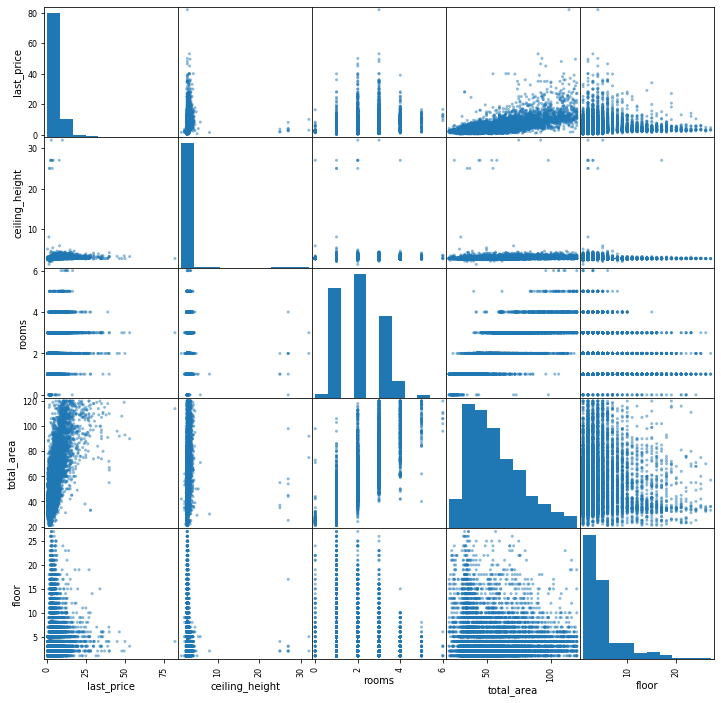

In [98]:
corr_table_center = center_house[['last_price','ceiling_height','rooms','total_area','floor']]
pd.plotting.scatter_matrix(corr_table_center, figsize=(12,12))
print(corr_table_center.corr())

Для всех данных:

                last_price  ceiling_height     rooms  total_area     floor
last_price        1.000000        0.076963  0.393830    0.692056  0.083431
ceiling_height    0.076963        1.000000  0.018398    0.053795 -0.008700
rooms             0.393830        0.018398  1.000000    0.788827 -0.165347
total_area        0.692056        0.053795  0.788827    1.000000 -0.021961
floor             0.083431       -0.008700 -0.165347   -0.021961  1.000000


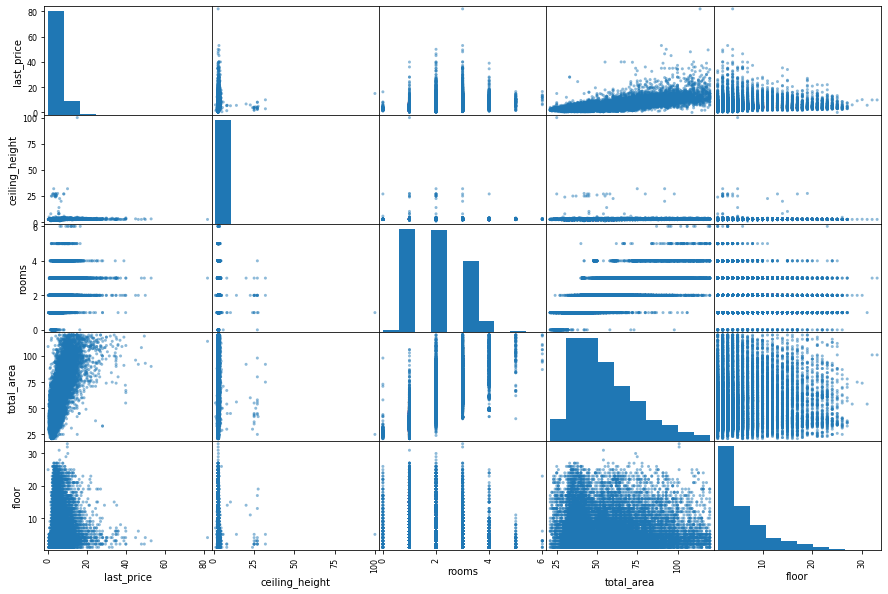

In [99]:
corr_table = data[['last_price','ceiling_height','rooms','total_area','floor']]
pd.plotting.scatter_matrix(corr_table, figsize=(15,10))
print(corr_table.corr())

In [100]:
center_house[['last_price','total_area','rooms','ceiling_height','days_exposition',
                  'published_weekday','published_month','published_year']].corr().sort_values('last_price', ascending=False)

,last_price,total_area,rooms,ceiling_height,days_exposition,published_weekday,published_month,published_year
last_price,1.000000,0.653954,0.351797,0.103462,0.092932,-0.020809,0.002648,-0.063128
total_area,0.653954,1.000000,0.797420,0.095845,0.110457,-0.019787,0.011489,-0.096023
rooms,0.351797,0.797420,1.000000,0.046195,0.083121,-0.001559,-0.004197,-0.066058
ceiling_height,0.103462,0.095845,0.046195,1.000000,0.007796,-0.005178,0.003905,0.004379
days_exposition,0.092932,0.110457,0.083121,0.007796,1.000000,-0.014364,0.001561,-0.627918
published_month,0.002648,0.011489,-0.004197,0.003905,0.001561,0.030597,1.000000,-0.255396
published_weekday,-0.020809,-0.019787,-0.001559,-0.005178,-0.014364,1.000000,0.030597,-0.000648
published_year,-0.063128,-0.096023,-0.066058,0.004379,-0.627918,-0.000648,-0.255396,1.000000


In [101]:
data[['last_price','total_area','rooms','ceiling_height','days_exposition',
                  'published_weekday','published_month','published_year']].corr().sort_values('last_price', ascending=False)

,last_price,total_area,rooms,ceiling_height,days_exposition,published_weekday,published_month,published_year
last_price,1.000000,0.692056,0.393830,0.076963,0.056653,-0.014311,0.001203,-0.018059
total_area,0.692056,1.000000,0.788827,0.053795,0.088317,-0.009878,0.006604,-0.067720
rooms,0.393830,0.788827,1.000000,0.018398,0.057383,-0.000774,-0.003663,-0.038372
ceiling_height,0.076963,0.053795,0.018398,1.000000,0.002811,-0.008188,-0.002970,0.004322
days_exposition,0.056653,0.088317,0.057383,0.002811,1.000000,-0.013099,0.007901,-0.611800
published_month,0.001203,0.006604,-0.003663,-0.002970,0.007901,0.011986,1.000000,-0.269765
published_weekday,-0.014311,-0.009878,-0.000774,-0.008188,-0.013099,1.000000,0.011986,-0.005323
published_year,-0.018059,-0.067720,-0.038372,0.004322,-0.611800,-0.005323,-0.269765,1.000000


### Вывод

Квартиры в центре (медианное значение) :  
площадь: 53 кв. метра  
цена : 3.6 млн рублей  
комнаты : 2,65  
высота потолков 7.7  
продажа: 77 дня  
Квартиры по всей таблице(медианное значение)  
площадь: 50 кв. метров  
цена: 4,5 млн рублей  
комнаты: 2 комнаты  
высота потолков: 2.65 метров  
продажа: 72 дня

### Шаг 5. Общий вывод

#### Немного про предобработку: 
Согласно данным, пропущенных значений было достаточно много и требовалось привести некоторые столбцы к нужному формату. Так, first_day_exposition привели к читаемому форматуc помощью to_datetime, is_apartment для удобства поменяли c булева типа, на int (1,0). Аналогично со studio, open_plan. last_price и total_area следует привели к int c float. last_price перевели в млн. руб. Заменили пропуски в is_apartment на False, ибо люди, не живущие в апартаментах, просто не указывают данную информацию, продавая недвижимость, а затем привели столбец is_apartment в тип int. Пустые значения balcony заменили на 0. Привели к нижнему регистру столбец locality_name и поменяли везде ё на е, чтоб повторений не было.Значения высоты потолка (ceiling_height) , скорее всего, люди просто не указывали. Заменили в данном столбце пропуски на медиану. Заменили их на -1 пустые значения в столбцах, где нельзя и , чтобы в будущем анализе было легче провести срез. Перевели столбцы в формат *int* 'floors_total', 'living_area', 'kitchen_area', 'airports_nearest','cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition' так как 'floors_total', 'days_exposition', 'ponds_around3000', parks_around3000 - явно целочисленные выражения, тогда как для остальных значений нас интересуют м^2 - значения в см^2 нерелевантны.
#### Анализ
Площадь квартир распределена, в основном, между 30 и 50 м^2. Медиана равна 52 м^2.Выбросы лежат после 110 м^2.
Цена квартир распределена, в основном, между 0 и 10 млн. руб. Дороже 12 млн. - выбросы.
Количество комнат - , в основном, 1,2 и 3 - комнатные квартиры. Больше или равно 7 комнат - выбросы.
Насчет высоты потолков - между 2 и 3 метрами в основном. Выбросы после 3 метров.
Объявления, в основном, размещены до 75 дней, медиана - 74 дня, тогда как среднее равно 156, что означает, что выборка скошена вправо. Выбросы после 450 дней.
Были построены срезы без части выбросов, удалены некоторые строчки.
Наибольшая медианная стоимость недвижимости - в 2014 году, наименьшая в 2016 и 2017 годам. При размещении в феврале недвижимости - стоимость выше, наименьшая стоимость в мае. Четверг- воскресенье - наименее удачные дни, при которых медианная стоимость недвижимости ниже всего, во вторник - наиболее высокая.
Чем больше площадь квартиры, тем больше цена.
Чем большее число комнат, тем больше цена.
Чем меньше расстояние от квартиры до центра, тем она дороже.
На первом этаже - самые дешевые квартиры.
Самая высокая медианная стоимость жилья в Санкт-Петербурге - 104 545 рублей за квадратный метр. Город Пушкин на 2 месте - 100000 рублей.
Самая низкая медианная стоимость жилья расположена в Выборге - 58 500 рублей за квадратный метр, скорее всего потому что Выборг самый отдаленный населенный пункт от Санкт-Петербурга из всех перечисленных.
Центр находится в 6 км. Видно, что чем дальше от центра, тем дешевле квартира.



### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод